# COT5600 Homework Assignment 3

Daniel Silva

In [0]:
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## Problem 1

### Fourier Matrix

The below function will create a Fourier matrix of size N, $F_N=(q_{k,\ell})\in\mathbb{C}^{N\times N}$, 
whose entries are given by
$$q_{k,\ell}=\frac{1}{\sqrt{N}} \omega^{k \cdot \ell}$$ for $k, \ell \in \{0,\ldots,N-1\}$, where $\omega=\mathrm{exp}(2\pi i/N)$

In [0]:
def get_fourier_matrix(n):
  # Create empty N x N matrix
  F = np.matrix(np.empty((n, n), dtype=np.complex))

  # Calcualate omega
  w = np.exp((2 * np.pi * 1J) / n)

  # Build fourier matrix
  for k in range(n):
    for l in range(n):
      F[k, l] = w ** (k * l)

  # Scale F by 1/sqrt(N), ensuring F is a unitary matrix
  F /= np.sqrt(n)

  return F

In [170]:
# Create NxN fourier matrix, where N is a random integer between 2 and 10

n = np.random.randint(2, 10)
print('N: {}'.format(n))

F = get_fourier_matrix(n)

N: 4


In [171]:
# Display fourier matrix
print(F)

[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0.5+0.j   0. +0.5j -0.5+0.j  -0. -0.5j]
 [ 0.5+0.j  -0.5+0.j   0.5-0.j  -0.5+0.j ]
 [ 0.5+0.j  -0. -0.5j -0.5+0.j   0. +0.5j]]


**Verifying the fourier matrix is unitary**

To do so, we show that the complex conjugate transpose of the fourier matrix is equal to its inverse.























In [172]:
# Leveraging np.allclose(), which returns True if two matrices are equal within a small tolerance

np.allclose(F.H, np.linalg.inv(F))

True

**Verifying the fourth power of F is equal to the identity matrix**

In [173]:
np.allclose(F ** 4, np.eye(n))

True

**Verifying the fourier matrix's eigenvalues are 1, -1 and i or -i**

Note that I will do this visually by simply printing out the eigenvalues of the unitary and ensuring they contain 1, -1 and either i or -i

In [178]:
eigs = np.linalg.eigvals(F)
print('Eigenvalues: ')
for eig in np.unique(eigs):
  print(round(eig, 2))

Eigenvalues: 
(-1+0j)
1j
(1-0j)
(1+0j)


### Cyclic Shift Matrix

The below function will create a cyclic shift matrix $P_N=(p_{k,\ell})\in\mathbb{C}^{N\times N}$ of size N whose entries are given by 

$$ p_{k,\ell} = 1 \mbox{ if } \ell = k + 1 \pmod{N} $$

$$ p_{k,\ell} = 0 \mbox{ if } \ell \neq k + 1 \pmod{N} $$

In [0]:
def get_cyclic_shift_matrix(n):
  # Create empty matrix
  P = np.matrix(np.empty((n, n), dtype=np.complex))

  # Build cyclic shift matrix using decision process described above
  for k in range(n):
    for l in range(n):
      if l == (k+1) % n:
        P[k, l] = 1
      else:
        P[k, l] = 0

  return P

In [383]:
# Create NxN cyclic shift matrix, where N is a random integer between 2 and 10

n = np.random.randint(2, 10)
print('N: {}'.format(n))

P = get_cyclic_shift_matrix(n)

N: 4


In [384]:
# Display cyclic shift matrix
print(P)

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]


**Verifying the cyclic shift matrix is unitary**

To do so, we show that the complex conjugate transpose of the cyclic shift matrix is equal to its inverse.























In [385]:
np.allclose(P.H, np.linalg.inv(P))

True

**Verifying the Nth power of the cyclic shift matrix is the identity matrix**

In [386]:
np.allclose(P ** n, np.eye(n))

True

**Verifying the eigenvalues of the cyclic shift matrix are Nth roots of unity**

Note that I will do this by computing the nth roots of unity and comparing them to the eigenvalues of the unitary

In [0]:
def find_roots(n):
  """Computes the nth roots of unity"""
  roots = []

  for i in range(n):
    root = np.round(np.exp((2.0 * np.pi * 1j * i) / n), 3)
    roots.append(root)

  return roots

In [388]:
# Calculate and display the nth roots of unity 

roots = find_roots(n)
print(roots)

[(1+0j), 1j, (-1+0j), (-0-1j)]


In [389]:
# Calcualate and display the eigenvalues of the cyclic shift matrix

eigs = np.round(np.linalg.eigvals(P), 3)
print(eigs)

[-1.+0.j  0.+1.j -0.-1.j  1.+0.j]


In [390]:
# Check each eigenvalue and ensure it is a nth root of unity

for eig in eigs:
  if eig not in roots:
    print('Oops! {} is not an nth root of unity. Check failed!'.format(eig))
    break
  else:
    print('{} is an nth root of unity!'.format(eig))

(-1+0j) is an nth root of unity!
1j is an nth root of unity!
(-0-1j) is an nth root of unity!
(1+0j) is an nth root of unity!


**Verifying the cyclic shift matrix is diagonalized by the fourier matrix**

This can be ensured by computing $F_N^\dagger P_N F_N$ and ensuring the result is a diagonal matrix.

In [391]:
F = get_fourier_matrix(n)
result = F.H*P*F
print(result)

[[ 1.+0.j -0.+0.j  0.+0.j  0.+0.j]
 [-0.-0.j  0.+1.j -0.-0.j -0.+0.j]
 [ 0.-0.j  0.-0.j -1.+0.j  0.-0.j]
 [ 0.-0.j  0.+0.j  0.+0.j  0.-1.j]]


We will now leverage the np.diag() method to numerically ensure this result is a diagonal matrix.

np.diag either extracts the diagonal elements from a matrix and returns them in a list, or builds a diagonal matrix from a list of elements.

Therefore, we can call this function twice consecutively to first extract the diagonal elements from our result, and then build a diagonal matrix from these elements. Finally, we use np.allclose() to ensure this rebuilt matrix is equal to our original result. If True, our result has been shown to be diagonal and we've proved the cyclic shift matrix is diagonalized by the fourier matrix. 

In [392]:
np.allclose(np.diag(np.diag(result)), result)

True

## Problem 2

### Quantum Phase Estimation Circuit

In [9]:
!pip install qiskit
!pip install qiskit-terra[visualization] 
!pip install qiskit ipywidgets

ERROR: Could not find a version that satisfies the requirement qiskit_textbook (from versions: none)
ERROR: No matching distribution found for qiskit_textbook


In [0]:
%matplotlib inline
import qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

%config InlineBackend.figure_format = 'svg' # For Jupyter Notebooks

In [2]:
token = 'bc478c2c21c23820f34e7df7b00ce5f69928b9b0371ee08e3d9d69c6ada4a34a1602ab869cf6f107aec0c2678b4b3f7dd3addccc379a01acafee71c81a4c035a'
IBMQ.save_account(token)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In this question, we implement the quantum phase estimation algorithm with 3-bit precision. This will allow us to estimate $\varphi$ in $U|\psi\rangle=e^{2 \pi i \varphi} |\psi\rangle$, given a unitary operator U.

**Setup**

Creating our quantum circuit with 3 control qubits and one target qubit, $|\psi\rangle$. 

We first initialize $|\psi\rangle$ to $|1\rangle$ using the X gate

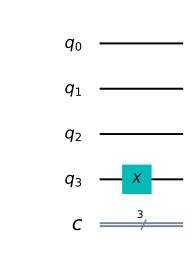

In [138]:
circ = QuantumCircuit(4,3)
circ.x(3)
circ.draw(output="mpl")

**Creating superposition**

We then apply hadamard gates to each of the three control bits to prepare them in the $|+\rangle$ state

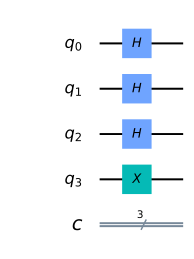

In [139]:
for i in range(3):
  circ.h(i)

circ.draw(output="mpl")

**Apply controlled unitary operations**

We then use phase kick back due to the controlled $U^{2^2}, U^{2^1}, U^{2^0}$ gates to prepare the state:

$$ 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^2 \varphi} |1\rangle ) \otimes 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^1 \varphi} |1\rangle ) \otimes 
\frac{1}{\sqrt{2}} ( |0\rangle + e^{2\pi i 2^0 \varphi} |1\rangle ) 
$$

In [0]:
for i in range(2, -1, -1):
  reps = 2 ** abs(i-2)
  for _ in range(reps):
    # Apply C-U gate with theta as pi/4
    # Note that with theta as pi/4, the C-U gate is equal to the T gate
    # Qubit 3 will always be the control bit here
    circ.cu1(np.pi/4, i, 3)

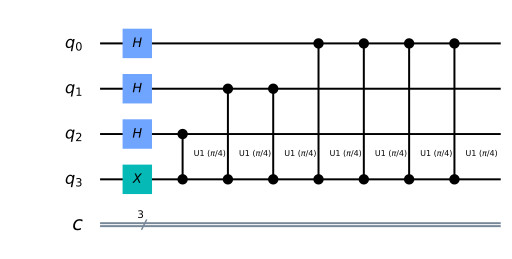

In [141]:
circ.draw(output="mpl")

**Apply inverse quantum Fourier transform**

We are now ready to apply the $F^\dagger$ to convert the register to the computational basis and retrieve the bits of the eigenphase.


In [0]:
def inverse_qft(circ):
  """applies an inverse QFT to the first 3 qubits in circ"""
  
  # Apply the appropriate number of R_k phase shifts to each qubit 
  # Note that R_k is realized with the C-U gate
  for j in range(3):
    for m in range(j):
      k = j - m + 1
      circ.cu1((2 * np.pi) / float(2 ** k), m, j)

    # Apply hadamard to each control qubit
    circ.h(j)

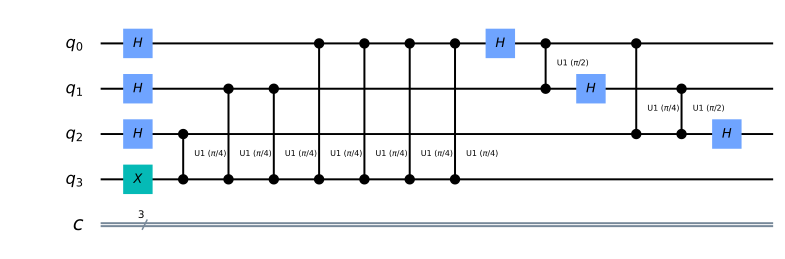

In [143]:
# Apply inverse QFT
inverse_qft(circ)

circ.draw(output="mpl")


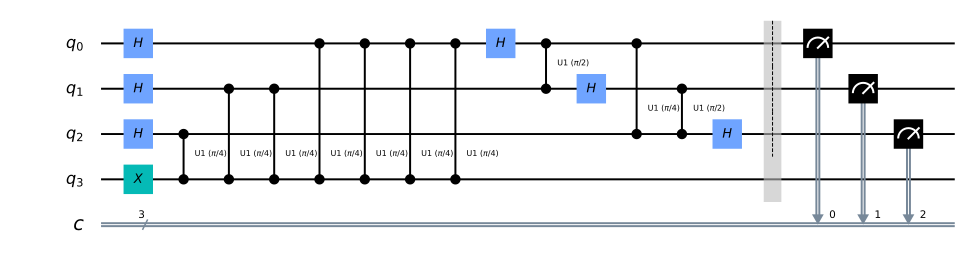

In [144]:
# Measure
circ.barrier(range(3))
circ.measure(range(3), range(3))

circ.draw(output="mpl")

In [0]:
# Execute the circuit on the qasm simulator and grab results
backend_sim = Aer.get_backend('qasm_simulator')

results = execute(circ, backend_sim, shots=1024).result()

{'111': 1024}


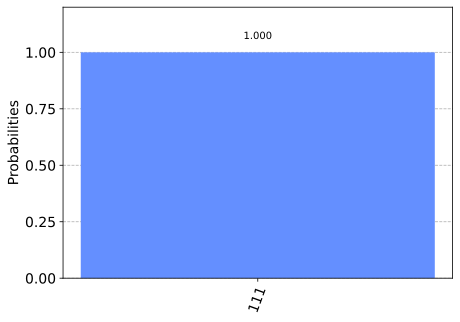

In [146]:
# Plots results using histogram
counts = results.get_counts(circ)
print(counts)
plot_histogram(counts)

We get the result 111, which is 7 in decimal base, with 100% certainty. In order to finally estimate $\varphi$, we simply divide this result by 2<sup>3</sup>.

$\varphi$ = 7 / 2<sup>3</sup> = 7/8

As expected, $\varphi$ = 7/8